Import libraries

In [13]:
import kaleido
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
pio.renderers.default = "svg"

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

# Part 1 : EDA and data preprocessing

In [32]:
df_walmart = pd.read_csv("Walmart_Store_sales.csv")
df_walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


# First statistics

In [15]:
print(f"Number of rows : {df_walmart.shape[0]}")
print(f"Number of columns : {df_walmart.shape[1]}")

Number of rows : 150
Number of columns : 8


In [16]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [17]:
df_walmart.describe(include  = 'all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [18]:
print("Percentage of missing values: ")
display(100 * df_walmart.isna().sum() / df_walmart.shape[0])

Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

## figures

figures the target variable

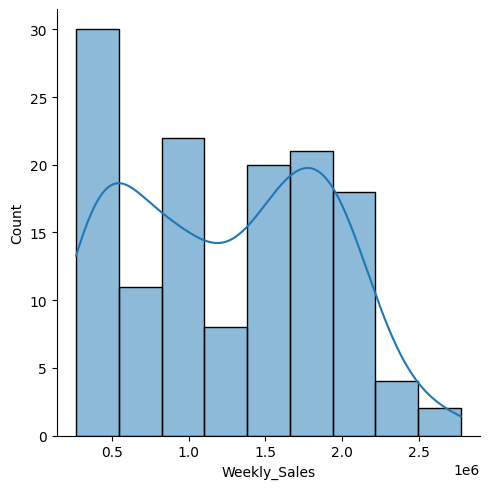

In [19]:
# distribution of Weekly_Sales - the target
sns.displot(df_walmart.Weekly_Sales, kde = True)

figures with categorical features

In [20]:
# transform the type of Store : float64 ==> object
df_walmart["Store"] = df_walmart["Store"].astype(str)
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    object 
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(6), object(2)
memory usage: 9.5+ KB


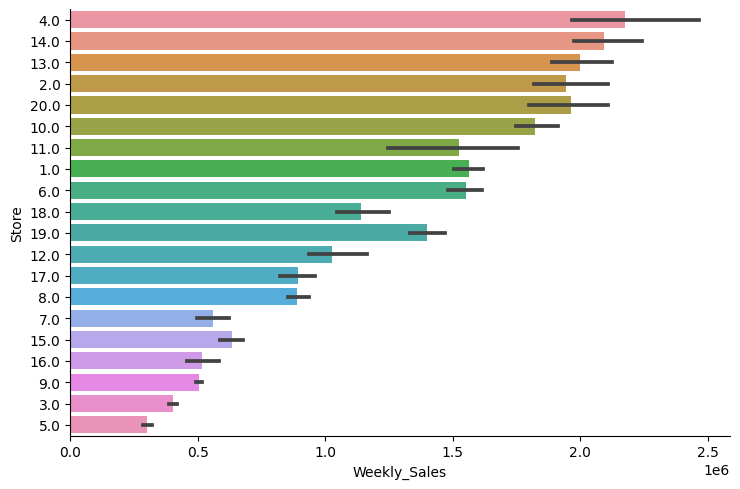

In [21]:
# weekly_sales by store
sns.catplot(x = "Weekly_Sales",
            y = "Store",
            data = df_walmart.sort_values('Weekly_Sales', ascending= False),
            kind = "bar",
            height = 5,
            aspect = 1.5)

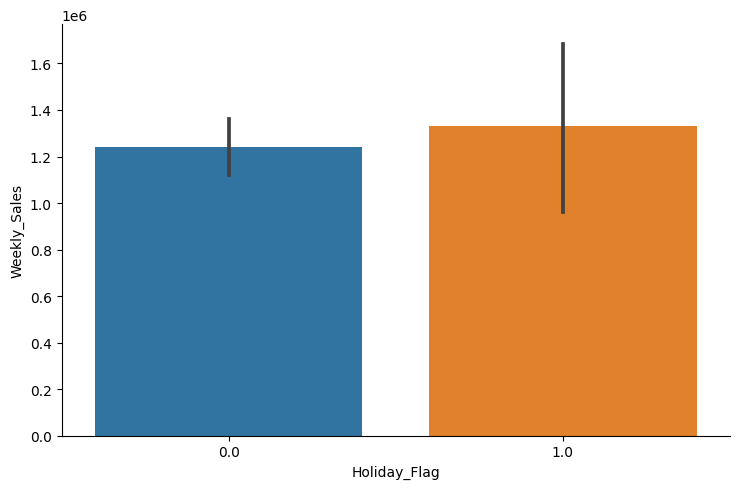

In [22]:
# weekly_sales if Holiday_Flag or not
sns.catplot(x = "Holiday_Flag",
            y = "Weekly_Sales",
            data = df_walmart,
            kind = "bar",
            height =5,
            aspect = 1.5)

figures with numerical vatiables

Text(0.5, 1.0, 'Linear regression between Temperature and Weely Sales by Holiday Flag')

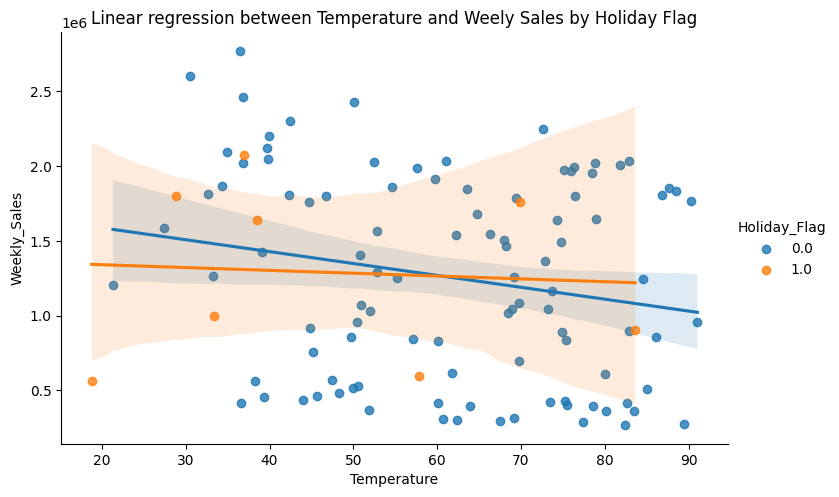

In [23]:
# Linear Regression between Temperature and Weely Sales by Holiday Flag
sns.lmplot(x = "Temperature",
           y = "Weekly_Sales",
           hue = "Holiday_Flag",
           data = df_walmart,
           height = 5,
           aspect = 1.5)
plt.title("Linear regression between Temperature and Weely Sales by Holiday Flag")

Text(0.5, 1.0, 'Linear regression between Fuel Price and Weely Sales by Holiday Flag')

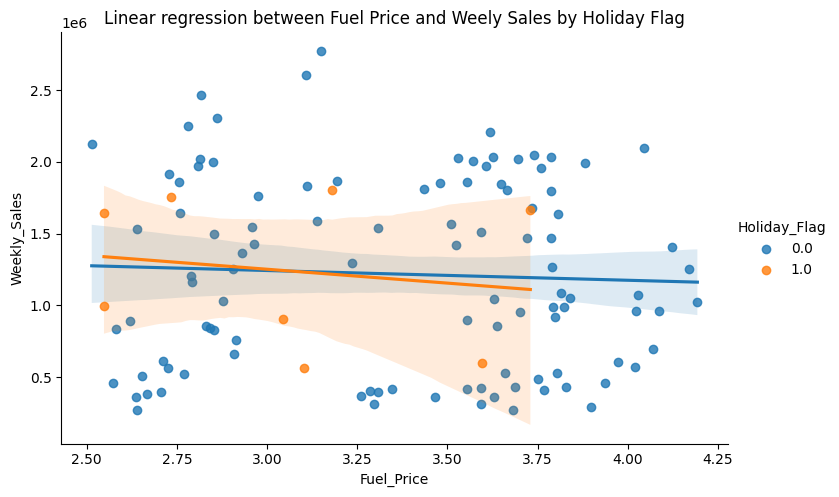

In [24]:
# Linear Regression between Fuel Price and Weely Sales by Holiday Flag
sns.lmplot( x = "Fuel_Price",
            y = "Weekly_Sales",
            hue = "Holiday_Flag",
            data = df_walmart,
            height = 5,
            aspect = 1.5)
plt.title("Linear regression between Fuel Price and Weely Sales by Holiday Flag")

Text(0.5, 1.0, 'Linear regression between CPI and Weely Sales by Holiday Flag')

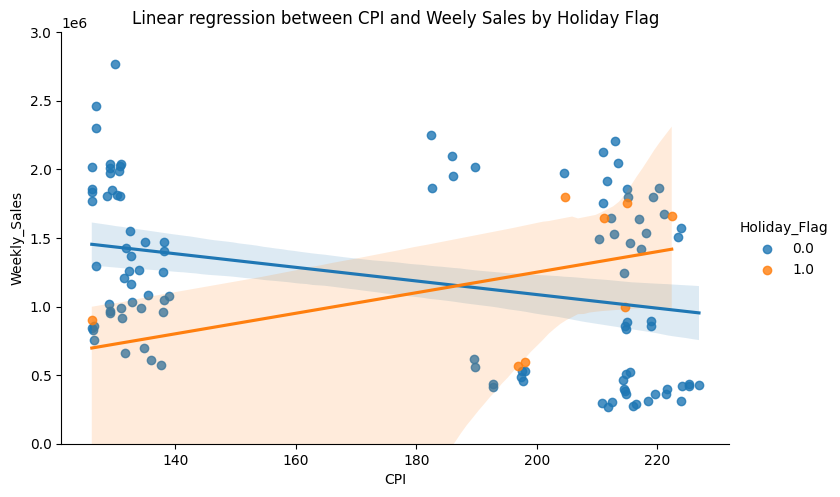

In [25]:
# Linear Regression between CPI (Prevailing consumer price index) and Weely Sales by Holiday Flag
# CPI : The consumer price index
sns.lmplot(x = "CPI",
           y = "Weekly_Sales",
           hue = "Holiday_Flag",
           data = df_walmart,
           height = 5,
           aspect = 1.5)

plt.ylim(0, 3e6)
plt.title("Linear regression between CPI and Weely Sales by Holiday Flag")

Text(0.5, 1.0, 'Linear regression between Unemployment and Weely Sales by Holiday Flag')

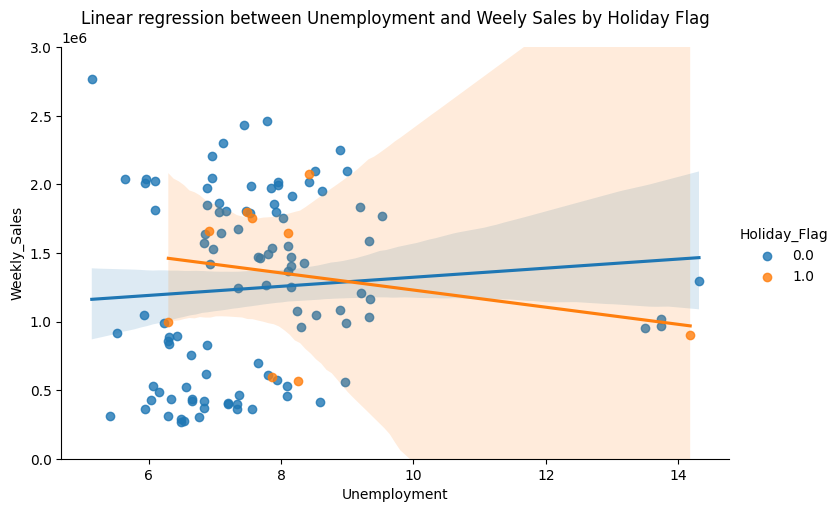

In [26]:
# Linear Regression between Unemployment and Weely Sales by Holiday Flag
sns.lmplot(x = "Unemployment",
           y = "Weekly_Sales",
           hue = "Holiday_Flag",
           data = df_walmart,
           height = 5,
           aspect = 1.5)
            
plt.ylim(0, 3e6)
plt.title("Linear regression between Unemployment and Weely Sales by Holiday Flag")

Text(0.5, 1.0, 'Linear regression between Unemployment and Weely Sales by Holiday Flag')

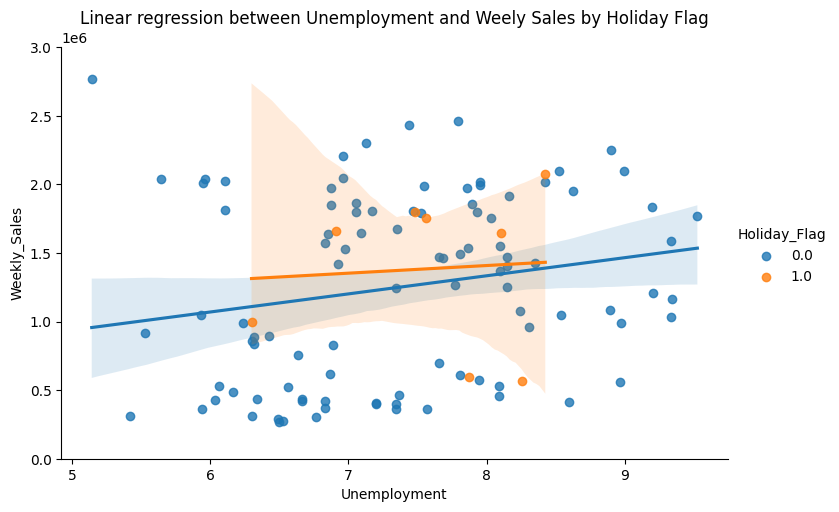

In [4]:
# Linear Regression between Unemployment and Weely Sales by Holiday Flag
mask = df_walmart["Unemployment"]<12
sns.lmplot(x = "Unemployment",
           y = "Weekly_Sales",
           hue = "Holiday_Flag",
           data = df_walmart[mask],
           height = 5,
           aspect = 1.5)
            
plt.ylim(0, 3e6)
plt.title("Linear regression between Unemployment and Weely Sales by Holiday Flag")

## Preprocessing to be planned with pandas

Drop lines where target values are missing 

In [33]:
df_walmart = df_walmart.dropna(subset = ["Weekly_Sales"])
df_walmart.shape

(136, 8)

Create usable features from the Date column

In [28]:
df_walmart.loc[:1,"Date"]

0    18-02-2011
1    25-03-2011
Name: Date, dtype: object

In [43]:
# transform Date object in datetime
df_walmart.loc[:,"Date"] = pd.to_datetime(df_walmart.loc[:,"Date"],format = "%d-%m-%Y")
df_walmart.loc[:,"Year"] = df_walmart.loc[:,'Date'].dt.year
df_walmart.loc[:,"Month"] = df_walmart.loc[:,'Date'].dt.month
df_walmart.loc[:,"Day"] = df_walmart.loc[:,'Date'].dt.day
df_walmart.loc[:,"DayOfWeek"] = df_walmart.loc[:,'Date'].dt.dayofweek

C:\Users\sylva\AppData\Local\Temp\ipykernel_10432\3760591883.py:2: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



Distribution of new features

2010.0    51
2011.0    37
2012.0    30
Name: Year, dtype: int64


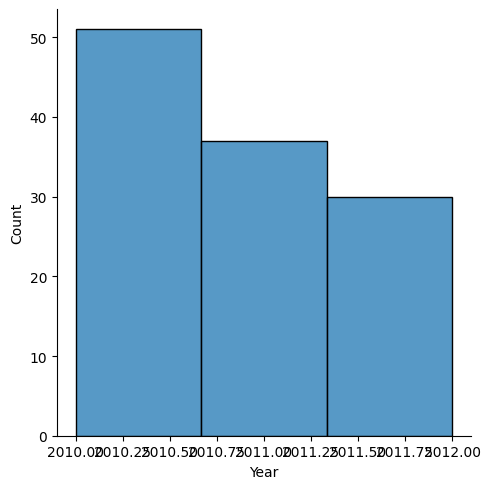

In [45]:
print(df_walmart['Year'].value_counts())
sns.displot(df_walmart['Year'], bins = 3)

5.0     14
6.0     14
2.0     12
7.0     12
8.0     11
3.0     10
4.0      9
12.0     8
10.0     8
11.0     8
9.0      7
1.0      5
Name: Month, dtype: int64


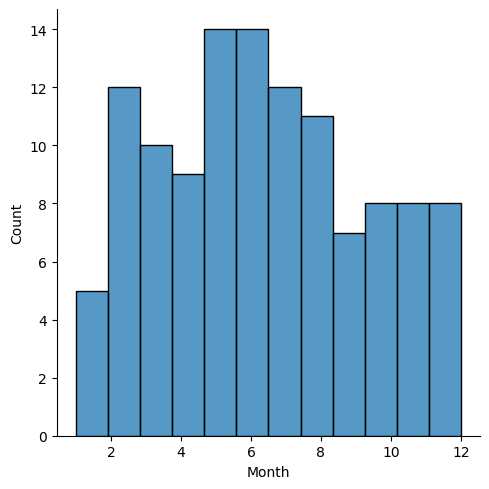

In [46]:
print(df_walmart['Month'].value_counts())
sns.displot(df_walmart['Month'], bins = 12)

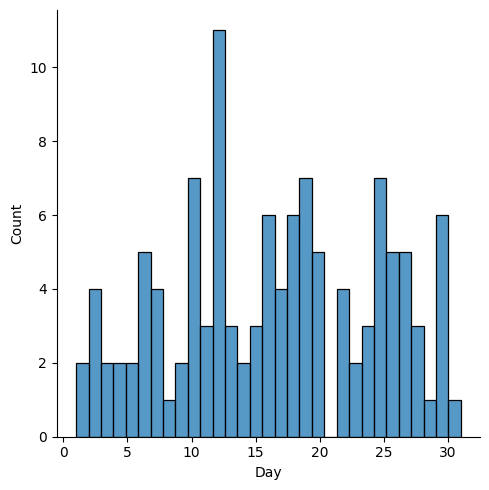

In [47]:
sns.displot(df_walmart['Day'], bins = 31)

4.0    118
Name: DayOfWeek, dtype: int64


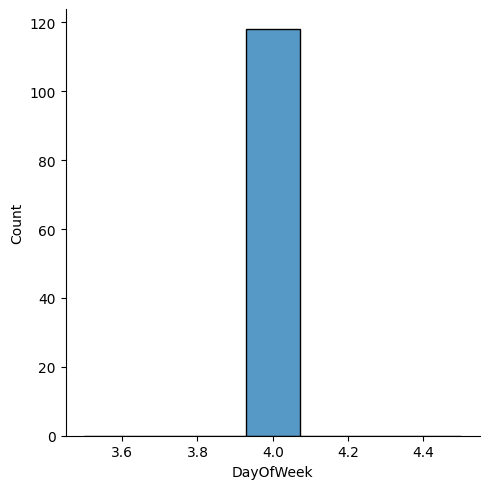

In [48]:
print(df_walmart['DayOfWeek'].value_counts())
sns.displot(df_walmart['DayOfWeek'], bins = 7)

Drop lines containing outliers

In [49]:
def drop_outliers(df, col):

    """ function with 2 arguments a dataFrame and a string, to remove outliers by columns
        numeric features that don't fall within the range : [mean(X) - 3*std(X) ; mean(X) + 3*std(X)]
    """
    to_keep = ((df[col] < df[col].mean() + 3 * df[col].std()) & (df[col] > df[col].mean() - 3 * df[col].std())) | df[col].isna()
    print(f'drop of {len(df)-len(df.loc[to_keep,:])} rows for the variable {col}')
    df = df.loc[to_keep,:]

    return df

In [50]:
outliers_features = ["Temperature","Fuel_Price", "CPI", "Unemployment"]

for col in outliers_features :
    df_walmart = drop_outliers(df_walmart, col)

df_walmart.shape

drop of 0 rows for the variable Temperature
drop of 0 rows for the variable Fuel_Price
drop of 0 rows for the variable CPI
drop of 5 rows for the variable Unemployment


(131, 12)

Preprocessings to be planned with scikit-learn

In [53]:
# Separate target variable Y from features X
target_name = 'Weekly_Sales'
drop_cols = ['Date', 'DayOfWeek','Weekly_Sales']

print("Separating labels from features...")
Y = df_walmart.loc[:,target_name]
X = df_walmart.drop(drop_cols, axis = 1)

Separating labels from features...


In [54]:
# First : always divide dataset into train set & test set !!
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

Dividing into train and test sets...


In [55]:
# Create pipeline for numeric features
numeric_features = ["Temperature","Fuel_Price", "CPI", "Unemployment", "Year", "Month", "Day"] # Names of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # missing values will be replaced by columns' median
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_features = ['Store', 'Holiday_Flag']  # Names of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore')) # first column will be dropped to avoid creating correlations between features
    ])

In [56]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [57]:
# Preprocessings on train set
X_train = preprocessor.fit_transform(X_train)

# Preprocessings on test set
X_test = preprocessor.transform(X_test)

# Part 2 : Baseline model (linear regression)

In [58]:
# Train model
model = LinearRegression()

print("Training model...")
model.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")

Training model...
...Done.


In [59]:
# Print scores
print("Accuracy on training set : ", model.score(X_train, Y_train).round(4)) 
print("Accuracy on test set : ", model.score(X_test, Y_test).round(4))

Accuracy on training set :  0.9741
Accuracy on test set :  0.9365


the model is good.

In [60]:
model.coef_

array([  -37954.32009007,   -40814.74179793,   100863.81798061,
         -97631.95922655,   -19332.33555953,    63292.99536424,
         -33575.68272691,   398262.65628698, -1259269.04845765,
         661398.54746845, -1404353.37199392,   -26412.91210232,
        -881707.53595689,  -753708.91205465, -1275038.07241279,
         730670.6513133 ,    20523.4125387 ,   582046.88685843,
         726942.50033939,  -624461.94790216, -1101418.29145774,
        -627061.61322781,  -112451.75388511,   130941.3455437 ,
         379836.6822029 ,   -47380.38218466])

In [61]:
column_names = []
for name, step, features_list in preprocessor.transformers_: # loop over steps of ColumnTransformer
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = step.get_feature_names_out() # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Store_2.0', 'Store_3.0', 'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Store_10.0', 'Store_11.0', 'Store_13.0', 'Store_14.0', 'Store_15.0', 'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_20.0', 'Holiday_Flag_1.0']


In [62]:
# Create a pandas DataFrame
feature_coefficients = pd.DataFrame(index = column_names, data = model.coef_, columns=["feature_coef"])
feature_coefficients = feature_coefficients.sort_values(by = 'feature_coef')
feature_coefficients

,feature_coef
Store_5.0,-1.404353e+06
Store_9.0,-1.275038e+06
Store_3.0,-1.259269e+06
Store_16.0,-1.101418e+06
Store_7.0,-8.817075e+05
Store_8.0,-7.537089e+05
Store_17.0,-6.270616e+05
Store_15.0,-6.244619e+05
Store_18.0,-1.124518e+05
Unemployment,-9.763196e+04


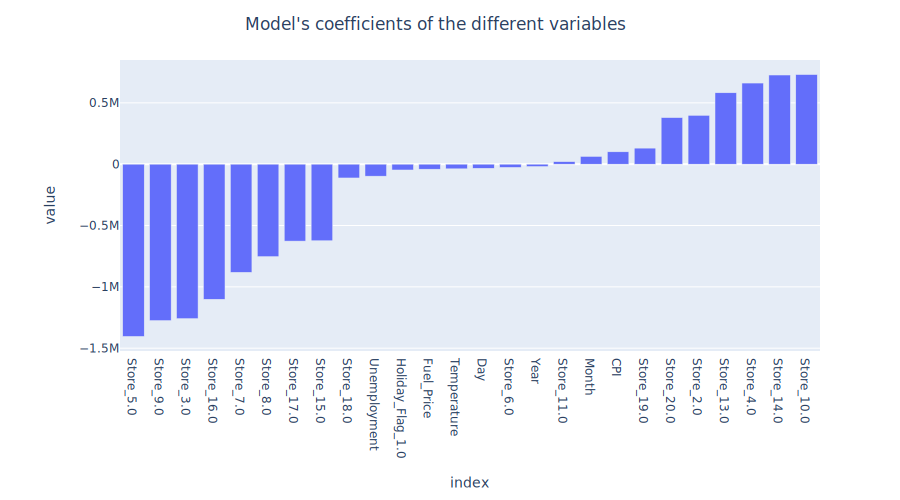

In [63]:
# Plot coefficients
fig = px.bar(feature_coefficients, orientation = 'v')
fig.update_layout(showlegend = False, 
                  margin = {'l': 120}, # to avoid cropping of column names
                  width = 900,
                  title = "Model's coefficients of the different variables",
                  title_pad_l = 200
                )
fig.show()

# Part 3 : Fight overfitting

Regularized linear regression model : Ridge

In [76]:
# Perform 5-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("5-fold cross-validation...")
ridge = Ridge()
scores = cross_val_score(ridge, X_train, Y_train, cv = 5)
print('The cross-validated R2-score is : ', scores.mean().round(4))
print('The standard deviation is : ', scores.std().round(4))

5-fold cross-validation...
The cross-validated R2-score is :  0.8487
The standard deviation is :  0.0523


Grid search : hyperparameter optimization

In [77]:
# Perform grid search
print("Grid search...")

# Grid of values to be tested
params = {
    'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(ridge, param_grid = params, cv = 5)
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_.round(4))

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.0001}
Best R2 score :  0.9463


In [78]:
# Print R^2 scores
print("R2 score on training set : ", gridsearch.score(X_train, Y_train).round(4))
print("R2 score on test set : ", gridsearch.score(X_test, Y_test).round(4))

R2 score on training set :  0.9741
R2 score on test set :  0.9365


The model is equal to the linear regression model

Regularized linear regression model : Lasso

In [79]:
# Perform 5-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("5-fold cross-validation...")
lasso= Lasso(tol = 1e-2) # for the algorithm to converge
scores = cross_val_score(lasso, X_train, Y_train, cv = 5)
print('The cross-validated R2-score is : ', scores.mean().round(4))
print('The standard deviation is : ', scores.std().round(4))

5-fold cross-validation...
The cross-validated R2-score is :  0.9463
The standard deviation is :  0.0183


In [82]:
# Perform grid search
print("Grid search...")

# Grid of values to be tested
params = {
    'alpha': [ 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5, 10, 15, 20, 25, 30, 100]
}
gridsearch = GridSearchCV(lasso, param_grid = params, cv = 5)
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_.round(4))

Grid search...
...Done.
Best hyperparameters :  {'alpha': 25}
Best R2 score :  0.9464


In [83]:
# Print R^2 scores
print("R2 score on training set : ", gridsearch.score(X_train, Y_train).round(4))
print("R2 score on test set : ", gridsearch.score(X_test, Y_test).round(4))

R2 score on training set :  0.9741
R2 score on test set :  0.937


The 3 models are very good, the regularization did not improve the results